## Final Assaignment

### Star Clusters (Data Analysis)


In [203]:
#Import libraries
import pandas
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import seaborn as sns
from scipy.optimize import minimize
import math
import pylab

### Dataset

In [76]:
names = ['x position', 'y position', 'z position', 'x velocity', 'y velocity', 'z velocity', 'Mass', 'Identification']
data = pandas.read_csv('c_0000.csv',names=names)


print(data.head(10))

x = data['x position'].values
y = data['y position'].values
z = data['z position'].values

vx = data['x velocity'].values
vy = data['y velocity'].values
vz = data['z velocity'].values

m = data['Mass'].values
Id = data['Identification'].values

   x position  y position  z position  x velocity  y velocity  z velocity  \
0    0.485939   -0.524359   -0.531982    0.461539   -0.033800   -0.322765   
1   -0.066000    0.080800   -0.276031   -0.575780    1.107815   -0.293408   
2   -0.034800    0.076800   -0.390880   -0.553991   -0.173861    0.059300   
3    1.502104    1.442983    1.449747   -0.090300    0.326612   -0.310594   
4   -0.009550    0.538341   -0.267264    0.011900   -0.011900   -0.405565   
5   -0.356017   -0.045700    0.335006   -0.709008   -0.649903    0.397949   
6   -0.397190   -1.401627   -0.757772    0.041300    0.718185    0.422623   
7   -0.916657    0.643472   -0.146350   -0.511860    0.220190   -0.529937   
8    2.241766    0.790756    0.290989    0.292099    0.053300   -0.472290   
9   -0.976209    0.445163   -0.705493   -0.120242   -0.231255   -0.227857   

       Mass  Identification  
0  0.000016               1  
1  0.000016               2  
2  0.000016               3  
3  0.000016               4  
4 

### 3D Plotting of location

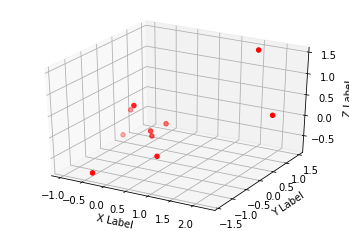

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array1 = data['x position'].values
array2 = data['y position'].values
array3 = data['z position'].values
x = array1[:10]
y = array2[:10]
z = array3[:10]

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
    
ax.scatter(x, y, z, c='r', marker='o')

#Annotation

plt.show()

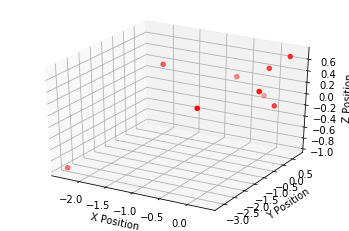

In [150]:
#2nd DataSet

names = ['x position', 'y position', 'z position', 'x velocity', 'y velocity', 'z velocity', 'Mass', 'Identification']
data2 = pandas.read_csv('c_0100.csv',names=names)

#3rd DataSet
data3 = pandas.read_csv('c_0200.csv',names=names)

#Value assaignemnt for Dataset 2
vx2 = data2['x velocity'].values
vy2 = data2['y velocity'].values
vz2 = data2['z velocity'].values

array11 = data2['x position'].values
array12 = data2['y position'].values
array13 = data2['z position'].values

m2 = data2['Mass'].values
Id2 = data2['Identification'].values

#Value assaignemnt for Dataset 3
vx3 = data3['x velocity'].values
vy3 = data3['y velocity'].values
vz3 = data3['z velocity'].values

array21 = data3['x position'].values
array22 = data3['y position'].values
array23 = data3['z position'].values

m3 = data3['Mass'].values
Id3 = data3['Identification'].values

#Next position of first 10 stars Dataset 2
x1 = array11[:10]
y1 = array12[:10]
z1 = array13[:10]

#Next position of first 10 stars Dataset 3
x2 = array11[:10]
y2 = array12[:10]
z2 = array13[:10]


#Figure creation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x1, y1, z1, c='r', marker='o')


ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

plt.show()

## Positional Vectors from t=0 to t=1

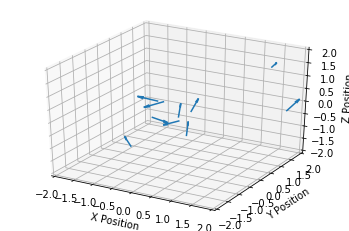

In [151]:
#Vector change for first 5 stars
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(-2.0, 2.0)
ax.set_ylim3d(-2.0, 2.0)
ax.set_zlim3d(-2.0, 2.0)
ax.quiver(x, y, z, x1, y1,z1, length = 0.5, normalize = True)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

plt.show()

## Positional Vectors from t=1 to t=2

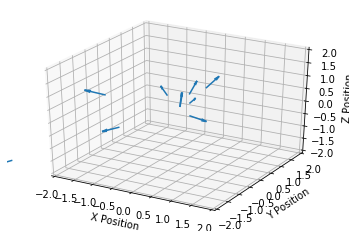

In [152]:
#Vector change for first 5 stars
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(-2.0, 2.0)
ax.set_ylim3d(-2.0, 2.0)
ax.set_zlim3d(-2.0, 2.0)
ax.quiver(x1, y1, z1, x2, y2, z2, length = 0.5, normalize = True)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

plt.show()

## Velocity Magnitude

In [161]:
#Determining magnitude of velocity for stars
def mag(x,y,z):
    r = math.sqrt((x**2) + (y**2) + (z**2))
    return r
f1 = np.vectorize(mag)

In [162]:
#Function testing
q = 1
w = 5
p = -6
mag(q, w, p)

7.874007874011811

In [165]:
f1(vx, vy, vz)

array([0.75830381, 0.90397523, 0.70058356, ..., 0.28183386, 0.54251702,
       0.59233535])

## Velocity Magnitude distribution Analysis

D:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


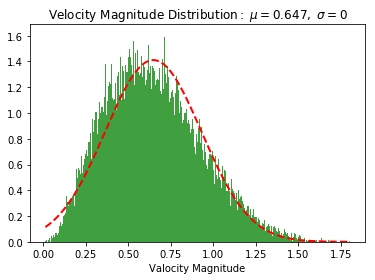

In [199]:
#Best fit Data
(mu, sigma) = norm.fit(f1(vx,vy,vz))

#Histogram of Data
n, bins, patches = plt.hist(f1(vx,vy,vz), 1000, normed=1, facecolor='green', alpha =0.75)

#Best Fit Line
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth = 2)

#Plot
plt.title(r'$\mathrm{Velocity\ Magnitude\ Distribution:}\ \mu=%.3f, \ \sigma=%3.f$' %(mu,sigma))
plt.xlabel('Valocity Magnitude')
plt.show()

## Ohm's Law, Maximum Power(Optimization)


# Problem
What should be the internal resistance in a battery to provide the maximum power transfer to the load?

We will be working with Ohm's Law

I = E/(R+r)

### Attempt 1

In [200]:
#Maximize power
def obj(x):
    #x1 is E, x2 is R, x3 is r
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    P = ((x1**2 )* x2)/((x2+x3)**2)
    return P

def power(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    I = x1/(x1+x3)
    P = (I**2) * x2
    return P

#determined from max power transfer theorem
def const(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return ((x1**2)/(4*x3))
    
#Guess for maximum power
# E = 1, R = 3, r = 5
x = [1, 3, 5]
print(obj(x))

0.046875


In [201]:
b=(0.0,12.0)
b2=(0.0,100.0) 
bnds = (b,b2,b2)
con1 = {'type' : 'eq', 'fun': const}


In [204]:
#Optimization (minimize function)
sol = minimize(obj,x,method='SLSQP', bounds = bnds, constraints=con1)

In [205]:
print(sol)

     fun: 1.8071282353439005e-07
     jac: array([ 3.64625914e-04,  6.23002165e-08, -1.79178670e-07])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.98245484e-03, 2.99338641e+00, 5.07506537e+00])


I Know from the maximum power theorem that R and r should equal each other and because of this, the minimize function isn't working. Will need to find out how to maximize the power results.

### Attempt 2

In [206]:
#Guess for maximum power
# E = 1, R = 3, r = 5
x = [1, 3, 5]
def func(x, sign=1.0):
    return sign*((x[0]**2 )* x[1])/((x[1]+x[2])**2)
print(func(x))

def func_der(x, sign=1.0):
    dfdr = sign*(((x[0]**2)*(x[1]*x[2]))/((x[1]+x[2])**3))
    return dfdr
print(func_der(x))


0.046875
0.029296875


In [207]:
#Optimization with negative argument so we get maximum
sol1 = minimize(func, [1, 3, 5], method = 'SLSQP', args=(-1.0), constraints = con1, options = {'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.807085745036092e-07
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


In [208]:
print(sol1)

     fun: -1.807085745036092e-07
     jac: array([-3.65182338e-04, -6.13583424e-08,  1.79056173e-07])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.97938392e-03, 3.00658417e+00, 5.06720381e+00])


Failed Attempt at maximizing. Again, r and R should be the same number.
## Attempt 3

In [209]:
#New constraint parameter inviolving derivatives
con2 = ({'type' : 'eq', 'fun': lambda x: np.array([((x[0]**2)/(4*x[2]))]), 
                       'jac': lambda x: np.array([(-4*x[2]**2)])})

sol2 = minimize(func, [1, 3, 5], method = 'SLSQP', args=(-1.0), options = {'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -192571505287995.0
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 8


In [213]:
#New constraint parameter inviolving derivatives
con2 = ({'type' : 'eq', 'fun': lambda x: np.array([((x[0]**2)/(4*x[2]))]), 
                       'jac': lambda x: np.array([(-4*x[2]**2)])})

sol2 = minimize(func, [1, 3, 5], method = 'SLSQP', args=(-1.0), options = {'disp': True})
print(sol2)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -192571505287995.0
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 8
     fun: -192571505287995.0
     jac: array([0., 0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 3.07784066e+09,  3.56718540e+08, -3.60907565e+08])


In order for the function to become maximized (as in having power maximized), the values of both resistances need to be the negative of one another. Using the method of SLSQP, we can see just how close these two values come to that with one being 3.56 and ther other being -3.609 with an error of about 1.1637%.